In [20]:
import os
import operator
import random
import calendar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from vixstructure.data import FuturesByMonth
from vixstructure.utils import parse_whole_directory_monthwise

In [21]:
mpl.rcParams["figure.figsize"] = 16, 9

In [22]:
data = parse_whole_directory_monthwise("models/experiment07/")

In [23]:
min_loss = data.groupby(("depth", "width", "month")).min()

In [24]:
monthly_mean = min_loss.groupby(("depth", "width")).mean()
monthly_std = min_loss.groupby(("depth", "width")).std()

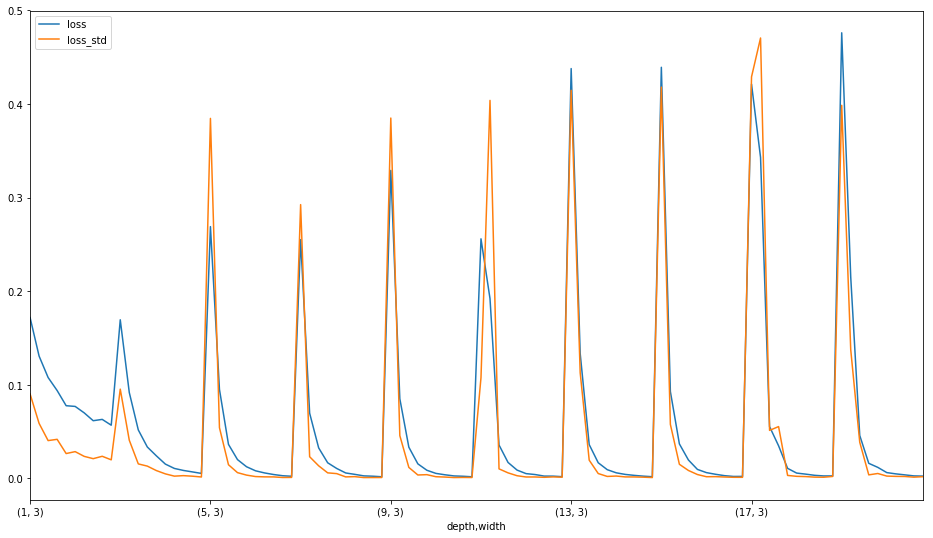

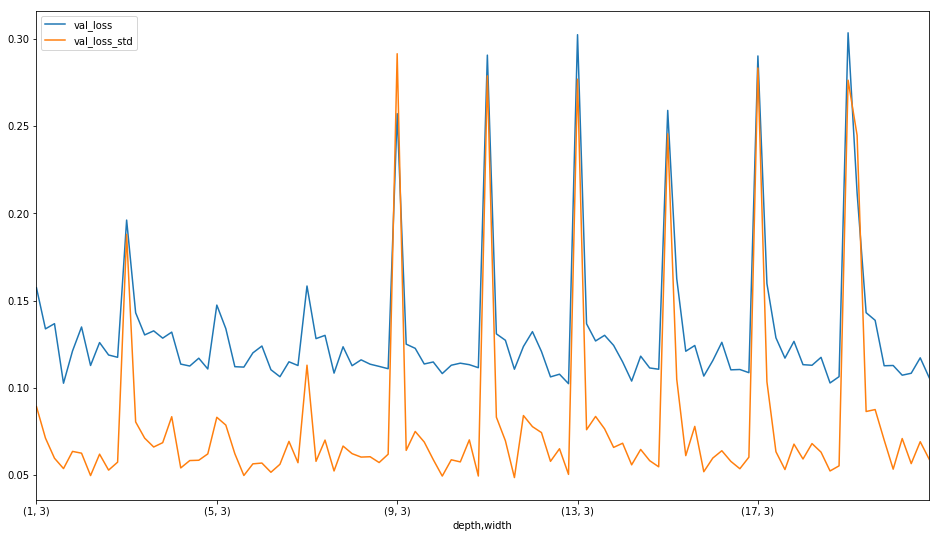

In [25]:
monthly_temp = monthly_mean.join(monthly_std, rsuffix="_std")
monthly_temp[["loss", "loss_std"]].plot()
monthly_temp[["val_loss", "val_loss_std"]].plot()
plt.show()

In [26]:
print(monthly_temp.to_string())

                 loss  val_loss  loss_std  val_loss_std
depth width                                            
1     3      0.171867  0.157421  0.090178      0.089349
      6      0.130683  0.133865  0.058773      0.071299
      9      0.107800  0.136845  0.040401      0.059789
      12     0.093887  0.102733  0.041752      0.053856
      15     0.077667  0.121210  0.026561      0.063690
      18     0.076914  0.134941  0.028609      0.062674
      21     0.070039  0.112888  0.023558      0.049854
      24     0.061648  0.126027  0.021095      0.062107
      27     0.063057  0.118898  0.023643      0.052969
      30     0.056849  0.117584  0.019845      0.057529
3     3      0.169473  0.196165  0.095373      0.187970
      6      0.091796  0.143079  0.040809      0.080561
      9      0.051801  0.130402  0.015498      0.071286
      12     0.033572  0.132723  0.013145      0.066212
      15     0.024149  0.128547  0.008395      0.068696
      18     0.015301  0.131992  0.004855      0

In [27]:
def plot3d_loss(dataframe, zlim=None, rotation=225):
    X = dataframe.index.levels[0]
    Y = dataframe.index.levels[1]
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(
            np.array(list(map(lambda x: dataframe[x[0], x[1]], np.reshape(np.dstack((X,Y)), (X.shape[0]*X.shape[1],2))))),
            X.shape)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=None, antialiased=True, cmap=cm.coolwarm_r)
    ax.view_init(azim=rotation)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Width")
    ax.set_xlim(X[0,0], X[-1,-1])
    ax.set_ylim(Y[0,0], Y[-1,-1])
    ax.set_zlim(zlim)
    ax.set_zlabel("Loss", rotation=90)

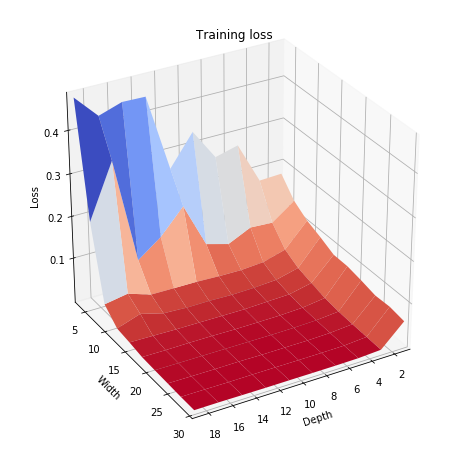

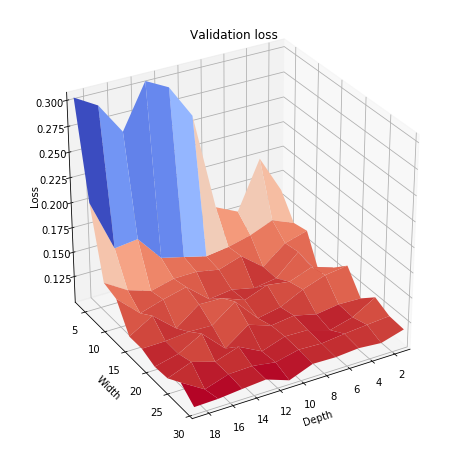

In [28]:
plot3d_loss(monthly_mean["loss"], rotation=60)
plt.title("Training loss")
plot3d_loss(monthly_mean["val_loss"], rotation=60)
plt.title("Validation loss")
plt.show()

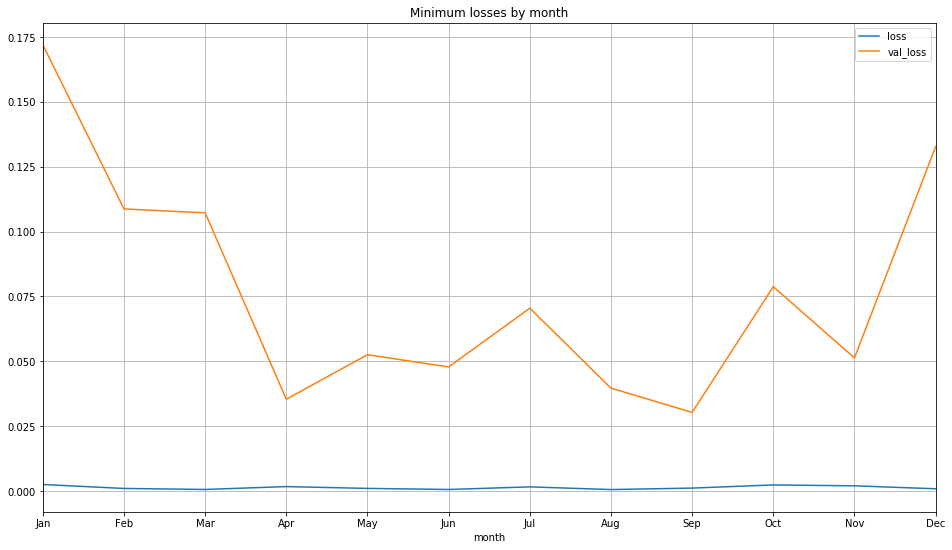

In [29]:
min_loss.groupby("month").min().plot()
plt.xticks(np.arange(1,13), calendar.month_abbr[1:])
plt.grid()
plt.title("Minimum losses by month")
plt.show()

# Experiment 7.1

Don't include VIX

In [30]:
data1 = parse_whole_directory_monthwise("models/experiment07.1/")

In [31]:
min_loss1 = data1.groupby(("depth", "width", "month")).min()
monthly_mean1 = min_loss1.groupby(("depth", "width")).mean()
monthly_std1 = min_loss1.groupby(("depth", "width")).std()

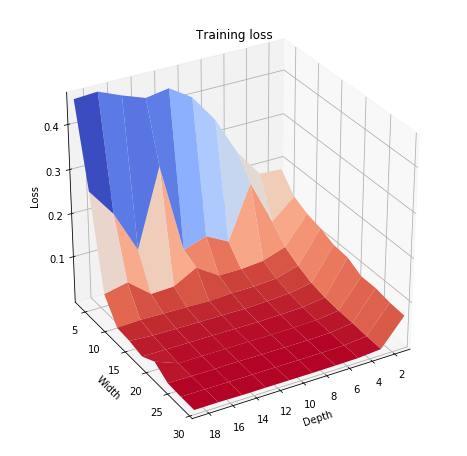

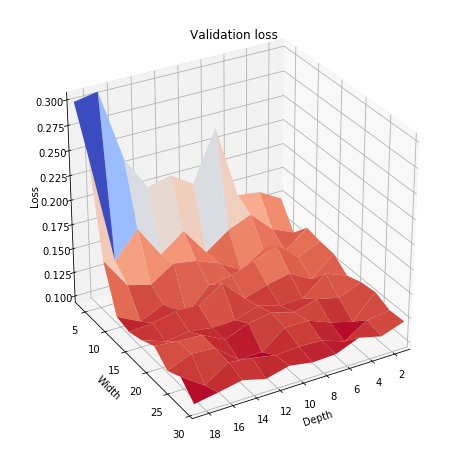

In [32]:
plot3d_loss(monthly_mean1["loss"], rotation=60)
plt.title("Training loss")
plot3d_loss(monthly_mean1["val_loss"], rotation=60)
plt.title("Validation loss")
plt.show()

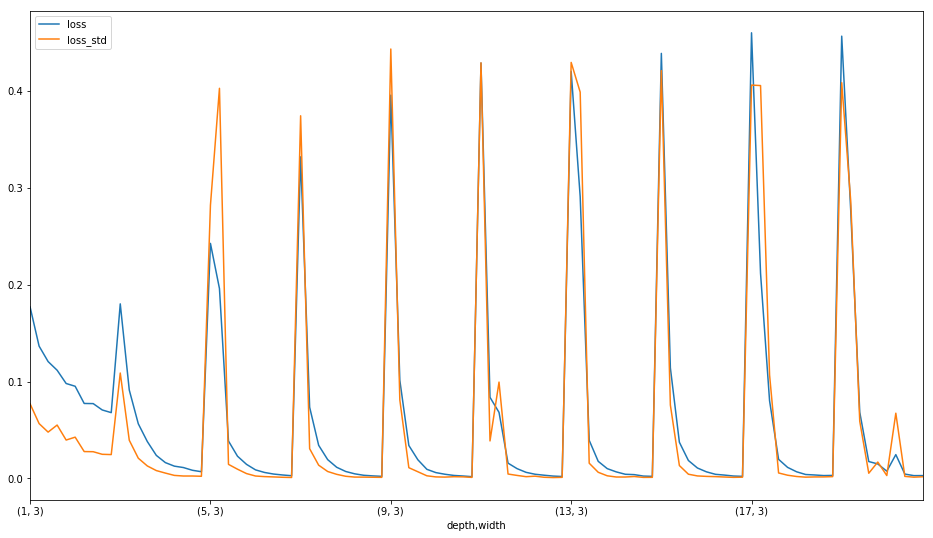

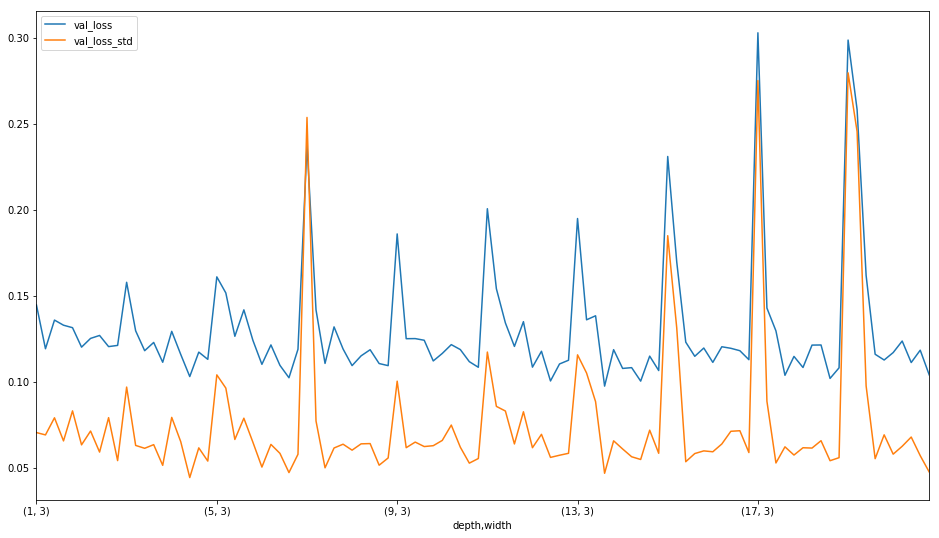

In [33]:
monthly_temp1 = monthly_mean1.join(monthly_std1, rsuffix="_std")
monthly_temp1[["loss", "loss_std"]].plot()
monthly_temp1[["val_loss", "val_loss_std"]].plot()
plt.show()

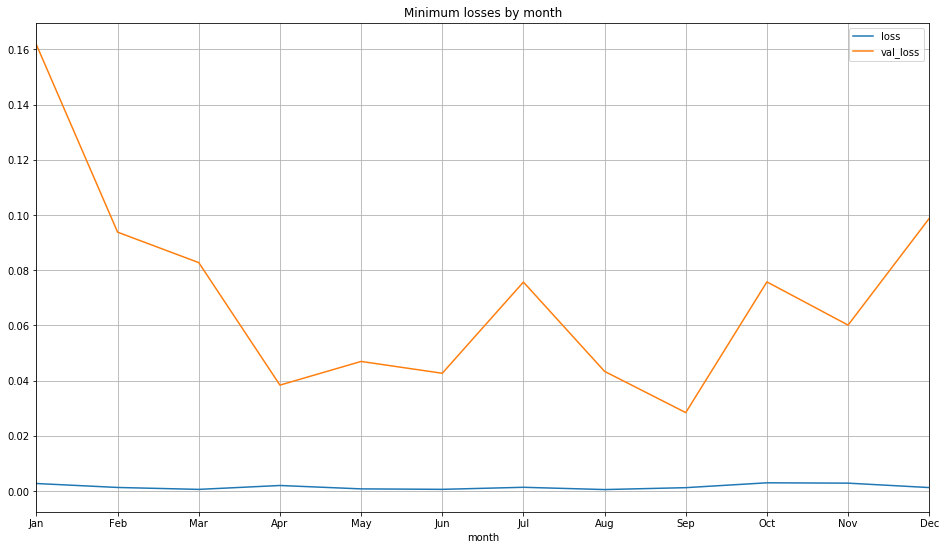

In [34]:
min_loss1.groupby("month").min().plot()
plt.xticks(np.arange(1,13), calendar.month_abbr[1:])
plt.grid()
plt.title("Minimum losses by month")
plt.show()